<a href="https://www.kaggle.com/code/jasonrobinson1/comprehensive-stroke-risk-prediction-some-best-pr?scriptVersionId=225244535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🏥 Comprehensive Stroke Risk Prediction: Some Best Practices  

This notebook provides a structured framework for developing a **high-performance stroke risk prediction model** using machine learning and AI techniques.  

The workflow follows industry best practices, covering **data preprocessing**, **exploratory analysis**, **model selection**, **evaluation**, **explainability**, and **deployment**.  

## 🌍 Why Stroke Prediction?  

Stroke is a major global health concern:  

> - It is one of the leading causes of **long-term disability**.  
> - According to the [CDC](https://www.cdc.gov/stroke/facts.htm), someone in the United States has a stroke **every 40 seconds**.  
> - The [WHO](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death) highlights stroke as a leading cause of global mortality.  

By applying **machine learning** to clinical and lifestyle data, we can **predict stroke risk** and offer early interventions, potentially **saving lives** and **reducing healthcare costs**.  

---

## 🩺 Table of Contents  

1. [Problem Definition](#problem-definition)  
2. [Data Preprocessing](#data-preprocessing)  
3. [Exploratory Analysis](#exploratory-analysis)  
4. [Feature Engineering](#feature-engineering)  
5. [Baseline Model Implementation](#baseline-model-implementation) (Linear Regression and Logistic Regression)  
6. [Tree-Based Models](#tree-based-models) (Decision Trees, Random Forest)  
7. [Advanced ML Models](#advanced-ml-models) (XGBoost)  
8. [Deep Learning Models](#deep-learning) (MLP)  
9. [Model Evaluation](#model-evaluation) (AUC, MAE, RMSE)  
10. [Explainability & Interpretability](#explainability--interpretability) (Feature Importance and SHAP)  
12. [AI Transparency with SHAP & Graphviz](#ai-transparency-with-shap-graphviz)  
13. [Future Work](#future-work)  
14. [Conclusion & References](#conclusion-references)  

---
## 1️⃣ Problem Definition <a name="problem-definition"></a>
 

**Objective:** Predict the risk of stroke given a patient's medical profile (e.g., demographic info, symptoms, lifestyle factors).  

### Key Considerations:  
- Medical Data often has **missing entries**, **class imbalance**, and **complex feature interactions**.  
- **Ethical & Regulatory constraints** (e.g., **HIPAA** in the US, **GDPR** in the EU) govern how we handle personal health information.  
- **Explainability is crucial** to ensure trust and adoption in clinical settings.  

---



In [1]:
# Data Handling & Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Evaluation Metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, accuracy_score, 
    classification_report, roc_curve, auc
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
import shap
import multiprocessing

# Interactive Widgets
import ipywidgets as widgets
from IPython.display import display

# GPU Check
import torch

print("GPU Available:", torch.cuda.is_available())  
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU Found")


GPU Available: False
GPU Name: No GPU Found


## 2️⃣ Data Preprocessing  
<a id="data-preprocessing"></a>

### 🗂️ Dataset Overview  

We utilize a **stroke risk dataset** containing **70,000 records**, including key attributes such as:  

✅ **Symptoms**: Chest Pain, Dizziness, Shortness of Breath  
✅ **Risk Factors**: High Blood Pressure, Irregular Heartbeat, Age  
✅ **Targets**:  
   - **Stroke Risk (%)** for **regression**  
   - **At Risk (Binary)** for **classification**  

---

### **🛠️ Data Cleaning & Transformation**  

🔹 **Handling Missing Values**  
   - Use **domain-appropriate imputation** (mean/mode for continuous & categorical features).  

🔹 **Feature Encoding**  
   - Apply **One-Hot Encoding** or **Label Encoding** if categorical variables exist.  

🔹 **Feature Scaling**  
   - Standardize continuous variables (e.g., **Age**) using `StandardScaler`.  


In [2]:
df = pd.read_csv('/kaggle/input/stroke-risk-prediction-dataset/stroke_risk_dataset.csv')

In [3]:
# Look at first 5 rows
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [4]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [5]:
# Convert Inf values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## 3️⃣ Exploratory Analysis  

### 📊 Exploratory Data Analysis (EDA)  

Key steps include:  

🔹 **Correlation Analysis**  
   - Identify strong relationships among risk factors (e.g., **Age vs. High Blood Pressure**).  
   - Helps determine which features are **highly correlated** and should be handled carefully.  

🔹 **Distribution Analysis**  
   - Plot **histograms** and **KDE plots** to detect **outliers** or **skewed variables**.  
   - Ensures that numerical variables (e.g., **Age, Stroke Risk %**) are well-behaved.  

🔹 **Feature Interaction**  
   - Certain **symptom combinations** (e.g., **Chest Pain & Shortness of Breath**) may be more predictive.  
   - Interaction effects between **risk factors & symptoms** can enhance model performance.  

📌 **Heatmap Visualization**  
A **heatmap** is useful for spotting features that most strongly impact stroke risk. It visualizes correlations between **symptoms, risk factors, and target variables**, helping us select **the most relevant features**.  


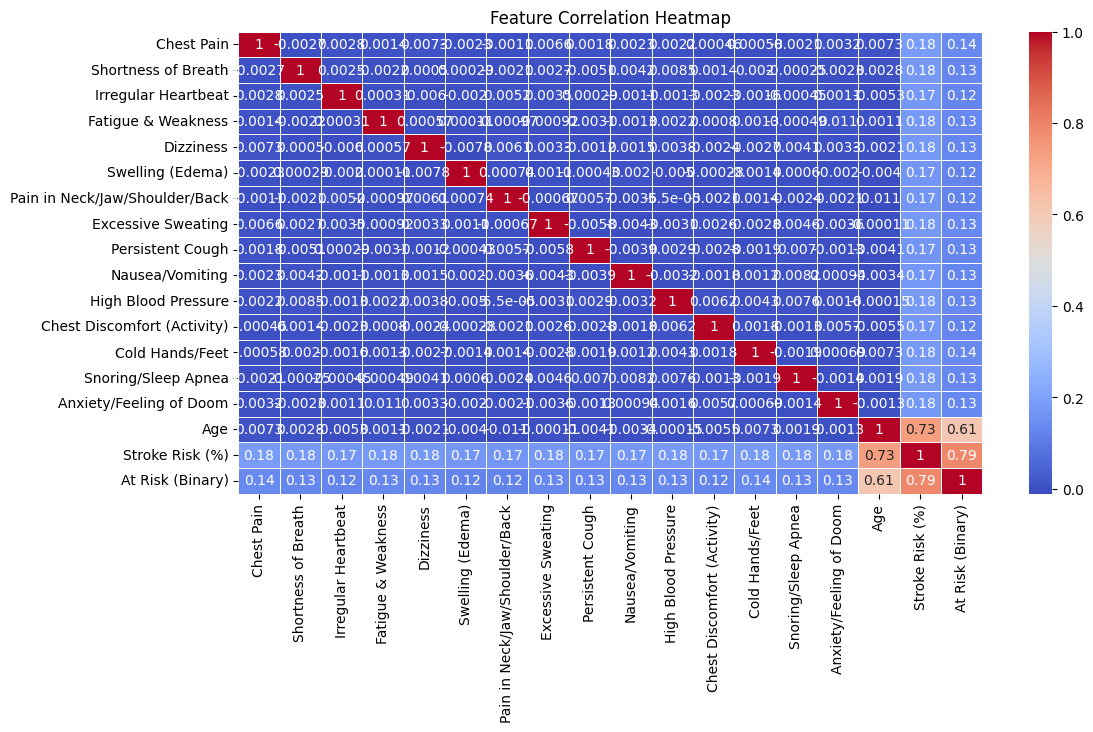

In [6]:
# Feature correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


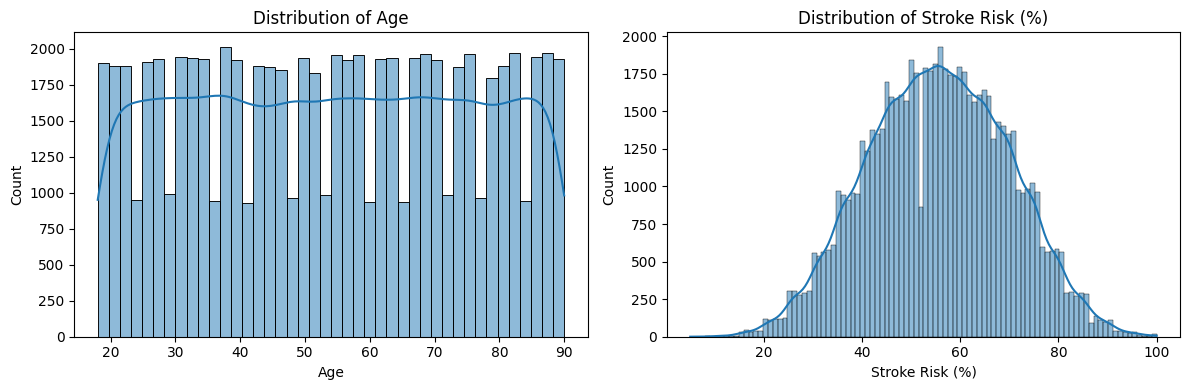

In [7]:
# Distribution Analysis Example
numeric_cols = ['Age', 'Stroke Risk (%)']

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(12, 4))
for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


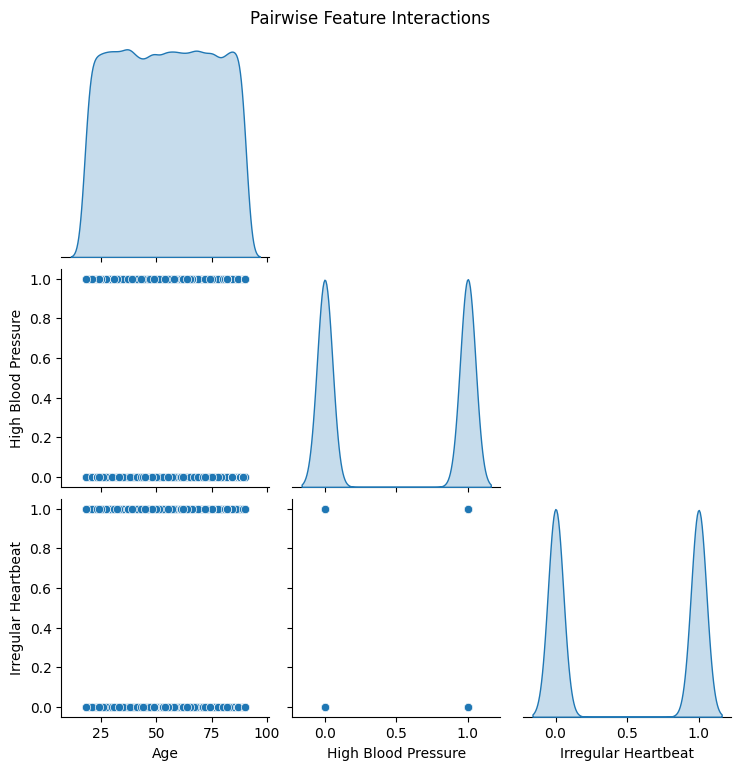

In [8]:
# Pairplot to visualize interactions between multiple features
interaction_cols = ['Age', 'High Blood Pressure', 'Irregular Heartbeat']
sns.pairplot(df[interaction_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Interactions", y=1.02)
plt.show()

**Interpretation:**

If **Age** distribution shows a peak around `50–60`, we know our dataset **skews older**, which may correlate with `higher stroke risk`.
If `Stroke Risk (%)` is mostly `<50%`, but a `smaller portion` extends up to 100%, those **high-risk outliers** could **disproportionately affect** our model errors.

    By combining distribution plots and pairwise analyses, we reveal important patterns—such as whether older age consistently aligns with higher stroke risk, or if patients with irregular heartbeat and hypertension form a distinct cluster. These insights guide us in feature engineering, data transformations, and model selection for subsequent steps in the workflow.

---

<div class="model-section">

## 4️⃣ Feature Engineering

### 📂 Transforming Raw Data 
Feature engineering transforms raw data into more meaningful representations, potentially boosting model performance. In our **stroke prediction** context, we can create or refine features that capture critical medical insights:

In [9]:
# Rename Columns
df.rename(columns={
    "Chest Pain": "chest_pain",
    "Shortness of Breath": "shortness_of_breath",
    "Irregular Heartbeat": "irregular_heartbeat",
    "Dizziness": "dizziness",
    "High Blood Pressure": "high_blood_pressure",
    "Stroke Risk (%)": "stroke_risk_percent",
    "At Risk (Binary)": "at_risk_binary"
}, inplace=True)

In [10]:
# Feature Engineering
df['symptom_score'] = (
    df['chest_pain'] 
    + df['shortness_of_breath'] 
    + df['dizziness']
)

df['bp_heartbeat_interaction'] = (
    df['high_blood_pressure'] * df['irregular_heartbeat']
)

In [11]:
# Feature & Target Selection
X = df.drop(columns=["at_risk_binary", "stroke_risk_percent"])
y_reg = df["stroke_risk_percent"] 
y_cls = df["at_risk_binary"] 

In [12]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

In [13]:
# Standardizing numerical features
scaler = StandardScaler()

X_train_reg["Age"] = scaler.fit_transform(X_train_reg[["Age"]])
X_test_reg["Age"] = scaler.transform(X_test_reg[["Age"]])

X_train_cls["Age"] = scaler.transform(X_train_cls[["Age"]])
X_test_cls["Age"] = scaler.transform(X_test_cls[["Age"]])

## 5️⃣ Baseline Model Implementation

<h3> 📎 Choosing the Right Model </h3>
<p> We will experiment with multiple models:</p>
<ul>
  <li> 📉 <b>Linear Regression:</b> Establish a baseline for continuous stroke risk percentage</li>
  <li> ⚕️ <b>Logistic Regression:</b> Baseline classification approach for "At Risk" detection</li>
  <li> 🌳 <b>Random Forest:</b> Better handling of non-linear interactions</li>
  <li> ⚡ <b>XGBoost:</b> Optimized gradient boosting for accuracy</li>
  <li> 🤖 <b>Neural Networks:</b> Deep learning for complex patterns</li>
</ul>


### Best Practices for Model Selection

| **Model**             | **Strengths**                                                                 | **Weaknesses**                                                                                           |
|-----------------------|-------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Linear Regression** | - **Fast training** and easy to implement<br/>- Highly **interpretable**       | - Assumes a **linear** relationship<br/>- **Sensitive** to outliers                                       |
| **Logistic Regression** | - Straightforward **binary classification**<br/>- **Interpretable** coefficients | - Limited to **linear boundaries**<br/>- Can **underfit** more complex relationships                       |
| **Decision Trees**    | - **Simple to understand** and interpret<br/>- Handles **both numerical and categorical data** | - **Prone to overfitting**<br/>- **Sensitive** to small variations in data (high variance)               |
| **Random Forest**     | - **Non-linear** modeling<br/>- **Robust** to outliers and missing data        | - Can become **large** and slow<br/>- Might **overfit** if not properly tuned                             |
| **XGBoost**           | - Often **state-of-the-art** for tabular data<br/>- Built-in **regularization** | - **Numerous hyperparameters**<br/>- Can **overfit** if aggressively boosted                              |
| **MLP (Neural Nets)** | - **Captures complex interactions**<br/>- Scales to high-dimensional data       | - Typically **data-hungry**<br/>- **Sensitive** to hyperparameters and can be harder to interpret         |

---

After **splitting** data (e.g., 80% train, 20% test) for both **regression** (`Stroke Risk (%)`) and **classification** (`At Risk (Binary)`), we create baseline models:

---
**📌 Equation:**
Linear Regression models the relationship between **stroke risk percentage** $y$ and patient features $ X $ using a **linear equation**:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon
$$

Where:
- $ y$ = Predicted **stroke risk percentage**.
- $ beta_0$ = **Intercept term** (baseline risk).
- $ beta_i $ = **Coefficients (weights)** for each risk factor $X_i$.
- $ epsilon$  = **Error term**, accounting for variability not explained by $(X)$.

---
**📉 Loss Function:**
To optimize the model, we minimize the **Mean Squared Error (MSE)**, which measures the **average squared differences** between the actual $ y_i$ and predicted $hat{y}_i$ stroke risk values:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n $ = Total number of patients.
- $y_i $ = **Actual stroke risk** for patient $( i )$.
- $\hat{y}_i $ = **Predicted stroke risk** for patient $i$.
  
---


In [14]:
# Linear Regression for Stroke Risk Prediction
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

<div class="model-section" id="baseline-model-implementation">
    
### 🔹 Results:
Each additional year of age increases stroke risk by **0.75%**, and high BP contributes an additional **2.3% risk**.

---
</div>


### **📊 Logistic Regression for Stroke Risk Classification**

### **📌 Equation:**
Unlike **Linear Regression**, which predicts continuous values, **Logistic Regression** predicts a **probability** for binary classification using the **sigmoid function**:

$$
p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:
- $p(X)$ = Probability of stroke occurrence given input $X$.
- $\beta_0$ = Intercept (bias).
- $\beta_i$ = Weights (coefficients) for each feature $X_i$.
- $e$ = Euler’s number (natural logarithm base).

The sigmoid function **constrains the output** to a **range between 0 and 1**, making it interpretable as a **probability**.

---

### **📉 Loss Function: Cross-Entropy (Log Loss)**
To optimize the model, we use **Cross-Entropy Loss**, also known as **Log Loss**, which measures the difference between **true labels** $y$ and **predicted probabilities** $p(X)$:

$$
L = - \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Where:
- $n $ = Total number of patients.
- $y_i$ = Actual label (1 if stroke occurred, 0 otherwise).
- $p_i$ = Predicted probability of stroke occurrence.

**Why Cross-Entropy?**

✅ Penalizes incorrect classifications more heavily when confidence is high.  
✅ Encourages the model to output well-calibrated probabilities.  
✅ Works well for imbalanced datasets where one class dominates.

---

### **📌 Decision Boundary**
- If $p(X) > 0.5$, classify as **stroke risk (1)**.
- If $p(X) \leq 0.5$, classify as **no stroke risk (0)**.

$$
\hat{y} =
\begin{cases} 
1, & p(X) > 0.5 \\
0, & p(X) \leq 0.5
\end{cases}
$$

---


In [15]:
# Logistic Regression for At-Risk Classification
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls, y_train_cls)
y_pred_cls = log_reg.predict(X_test_cls)

## 6️⃣ Tree-Based Models

---
### 🌳 Decision Tree:

- **Node Splits**: Repeatedly partition data based on features (e.g., Age ≥ 60).
- **Interpretability**: Clinicians can easily follow the path (age > 60, irregular heartbeat = yes, etc.) to see how risk is determined.
- **Drawback**: A single tree can overfit unless pruned or combined (as in Random Forest).

The Gini Impurity of a node is:

$$
Gini = 1 - \sum_{i=1}^{c} p_i^2
$$

where $p_i$ is the proportion of each class.

In [16]:
# Train Decision Tree Classifier
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(X_train_cls, y_train_cls)
y_pred_dt_cls = dt_cls.predict(X_test_cls)

# Evaluate Decision Tree Classifier
print("Decision Tree Classification Performance:")
print(classification_report(y_test_cls, y_pred_dt_cls))

Decision Tree Classification Performance:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4892
           1       0.92      0.92      0.92      9108

    accuracy                           0.90     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.90      0.90      0.90     14000



### 🌲 Random Forest

Random Forest is an ensemble learning method that constructs multiple decision trees and combines their predictions through majority voting (classification) or averaging (regression).

**Key Advantages:**
✅ Handles non-linear relationships and feature interactions effectively.
✅ Robust to noise and outliers, reducing overfitting compared to single decision trees.
✅ Provides feature importance, offering interpretability in medical applications.

Mathematical Notation for Random Forest Prediction
Given **T** decision trees, the final prediction is computed as votes:

- **For Regression:**
  
$$\hat{y} = \frac{1}{T} \sum_{t=1}^{T} f_t(X)$$

where $f_t(X)$ is the prediction from the $t^{th}$ decision tree, and the final prediction is the **average** of all tree predictions.

- **For Classification (Majority Voting):**

$$\hat{y} = \text{mode} \left( f_1(X), f_2(X), ..., f_T(X) \right)$$

where each $f_t(X)$ represents the predicted class from an individual decision tree, and the final classification is determined by majority vote.



In [17]:
# Define function for model evaluation
def model_performance(y_true, y_pred, model_name):
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5  # Square root of MSE

    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 50)

In [18]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

# Evaluate Random Forest Regressor
model_performance(y_test_reg, y_pred_rf_reg, "Random Forest Regressor")

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 2.1844
Root Mean Squared Error (RMSE): 2.7340
--------------------------------------------------


In [19]:
# Random Forest Classifier with CPU
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls.predict(X_test_cls)

# Evaluate Random Forest Classifier
print("Random Forest Classification Performance:")
print(classification_report(y_test_cls, y_pred_rf_cls))

Random Forest Classification Performance:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4892
           1       0.95      0.97      0.96      9108

    accuracy                           0.95     14000
   macro avg       0.95      0.94      0.94     14000
weighted avg       0.95      0.95      0.95     14000



In [20]:
# Random Forest Classifier with GPU
#rf_cls = xgb.XGBClassifier(n_estimators=100, tree_method="gpu_hist")
#rf_cls.fit(X_train_cls, y_train_cls)
#y_pred_rf_cls = rf_cls.predict(X_test_cls)
#
## Evaluate Random Forest Classifier
#print(explainer.algorithm)
#print("Random Forest Classification Performance:")
#print(classification_report(y_test_cls, y_pred_rf_cls))

## 7️⃣ Advanced ML Model

### 🪜 XGBoost:

XGBoost (**Extreme Gradient Boosting**) is a powerful ensemble learning technique that builds a sequence of decision trees, where each tree corrects the errors of the previous one. Unlike Random Forest, which trains trees independently, XGBoost **boosts** weak learners sequentially to improve performance.

Each new tree in XGBoost is trained to **minimize the residual error** from the previous tree:

$$L = \sum_{i=1}^{n} \ell(y_i, F_{m-1}(x_i) + f_m(x_i))$$

where:
- $F_{m-1}$ is the previous model.
- $ f_m(x)$ is the correction tree.

---
### **📉 Loss Function**
XGBoost supports both **classification** and **regression** tasks, with different loss functions:

#### **🔹 Classification Loss (Log Loss)**
For **binary classification** (predicting if a patient is at stroke risk or not), XGBoost optimizes **log loss**, which is based on the probability output:

$$L = - \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

- If \( y_i = 1 \) (stroke occurred), we maximize \( \log(\hat{y}_i) \), encouraging high confidence in the prediction.
- If \( y_i = 0 \) (no stroke), we maximize \( \log(1 - \hat{y}_i) \), reducing false positives.

#### **🔹 Regression Loss (Mean Squared Error - MSE)**
For predicting **continuous stroke risk percentage**, XGBoost minimizes the **Mean Squared Error (MSE)**:

$$
L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- This penalizes large deviations between **predicted stroke risk** and **actual risk**, forcing the model to refine its predictions.
- MSE loss is suitable for risk score predictions where the output is **continuous** rather than binary.



**XGBoost** requires careful hyperparameter tuning to balance performance and overfitting. Key parameters include:
- **`max_depth`**: Controls tree depth (higher = more complexity).
- **`learning_rate`**: Shrinks updates to prevent overfitting.
- **`n_estimators`**: Number of boosting rounds (trees).

By tuning these effectively, XGBoost can become **one of the strongest models** for predicting stroke risk.


In [21]:
# XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

# Evaluate XGBoost Regressor
model_performance(y_test_reg, y_pred_xgb_reg, "XGBoost Regressor")

XGBoost Regressor Performance:
Mean Absolute Error (MAE): 0.9358
Root Mean Squared Error (RMSE): 1.1795
--------------------------------------------------


In [22]:
# XGBoost Classifier
xgb_cls = XGBClassifier(n_estimators=100, random_state=42)
xgb_cls.fit(X_train_cls, y_train_cls)
y_pred_xgb_cls = xgb_cls.predict(X_test_cls)

# Evaluate XGBoost Classifier
print("XGBoost Classification Performance:")
print(classification_report(y_test_cls, y_pred_xgb_cls))

XGBoost Classification Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



### 🔹 Results:

XGBoost iteratively **corrects residual errors**, making it one of the best-performing models.

---


### 🧮 Gain Calculation:

When **XGBoost** decides where to split a node, it calculates the **gain** (improvement in objective) from splitting on a specific feature at a given threshold. A common form of the gain equation is:

$$
Gain = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right] - \gamma
$$

where:

- $G_L$ and $G_R$ = Summed **gradients** for the left and right child.  
- $H_L$ and $H_R$ = Summed **hessians** for the left and right child.  
- $\lambda$ = **L2 regularization** term (prevents overfitting).  
- $\gamma$ = **Complexity cost** for adding an additional leaf (controls model complexity).

**Interpretation**:
- If **Gain** is **positive**, splitting that node on the chosen feature/threshold is beneficial.
- **Gradients** $G$ measure how much the prediction changes with respect to the loss.
- **Hessians** $H$ measure the curvature (second derivative of the loss function).

By **maximizing** Gain at each split, XGBoost effectively finds the most promising partition to **reduce residual errors** and **improve** model performance in stroke risk prediction.

In [23]:
# Train Decision Tree Classifier
dt_cls = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_cls.fit(X_train_cls, y_train_cls)

# Extract Gain for each feature
tree_ = dt_cls.tree_
n_nodes = tree_.node_count
feature_importance = tree_.compute_feature_importances(normalize=False)

# Display Gain values
feature_names = X_train_cls.columns
gain_values = {feature_names[i]: feature_importance[i] for i in range(len(feature_names))}
sorted_gain = dict(sorted(gain_values.items(), key=lambda item: item[1], reverse=True))

print("Feature Gain Values (Information Gain):")
for feature, gain in sorted_gain.items():
    print(f"{feature}: {gain:.4f}")

Feature Gain Values (Information Gain):
Age: 0.3902
symptom_score: 0.0759
Pain in Neck/Jaw/Shoulder/Back: 0.0401
Chest Discomfort (Activity): 0.0396
Snoring/Sleep Apnea: 0.0395
Cold Hands/Feet: 0.0389
Swelling (Edema): 0.0386
Fatigue & Weakness: 0.0384
Excessive Sweating: 0.0380
Anxiety/Feeling of Doom: 0.0355
Nausea/Vomiting: 0.0340
Persistent Cough: 0.0332
bp_heartbeat_interaction: 0.0269
irregular_heartbeat: 0.0202
high_blood_pressure: 0.0197
shortness_of_breath: 0.0100
chest_pain: 0.0086
dizziness: 0.0078


**Interpretation**:
- If **Gain** is **positive**, splitting that node on the chosen feature/threshold is beneficial.
- **Gradients** $G$ measure how much the prediction changes with respect to the loss.
- **Hessians** $H$ measure the curvature (second derivative of the loss function).

By **maximizing** Gain at each split, XGBoost effectively finds the most promising partition to **reduce residual errors** and **improve** model performance in stroke risk prediction.

---

## 8️⃣ Deep Learning Model

#### 🤖 Mulit-Layer Perception (MLP)
- **Architecture**: Fully-connected layers with non-linear activations (e.g., ReLU). 
- **Advantages**: Can model **complex feature interactions**, potential for high accuracy.
- **Challenges**: More hyperparameters to tune, requires larger datasets, interpretability can be more difficult.
  
A 2-layer **Multi-Layer Perceptron (MLP)**:
$$h = ReLU(W_1 X + b_1)$$
$$\hat{y} = \sigma(W_2 h + b_2)$$
where:
- $ W_i$ are weights, $b_i$ are biases.
- $ReLU(x)$ = $max(0, x)$ is the activation function.

---
#### 🔹 Backpropagation:
Weights are updated using:
$$W := W - \alpha \frac{\partial L}{\partial W}$$
where $alpha$ is the **learning rate**.


In [24]:
# Train MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                        alpha=0.0001, max_iter=500, random_state=42)

mlp_reg.fit(X_train_reg, y_train_reg)
y_pred_mlp_reg = mlp_reg.predict(X_test_reg)

# Evaluate MLP Regression Performance
model_performance(y_test_reg, y_pred_mlp_reg, "Neural Network Regressor")

Neural Network Regressor Performance:
Mean Absolute Error (MAE): 0.1444
Root Mean Squared Error (RMSE): 0.1673
--------------------------------------------------


In [25]:
# Train MLP Classifier
mlp_cls = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                        alpha=0.0001, max_iter=500, random_state=42)

mlp_cls.fit(X_train_cls, y_train_cls)
y_pred_mlp_cls = mlp_cls.predict(X_test_cls)

# Evaluate MLP Classification Performance
print("Neural Network Classification Performance:")
print(classification_report(y_test_cls, y_pred_mlp_cls))

Neural Network Classification Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4892
           1       1.00      0.99      1.00      9108

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



### 🔹 Results:
Neural networks **learn deep, non-linear patterns**, making them useful for **complex stroke risk prediction**.

---

## 9️⃣ Model Evaluation

### 🚀 Performance Summary
Model performance is assessed using key metrics:

- **Regression**: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)  
- **Classification**: Accuracy, Precision, Recall, Area Under the Curve (AUC)  

$$
\text{AUC}, \quad \text{MAE}, \quad \text{RMSE}
$$

**ROC Curves** illustrate the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate), helping to evaluate classification performance.

---

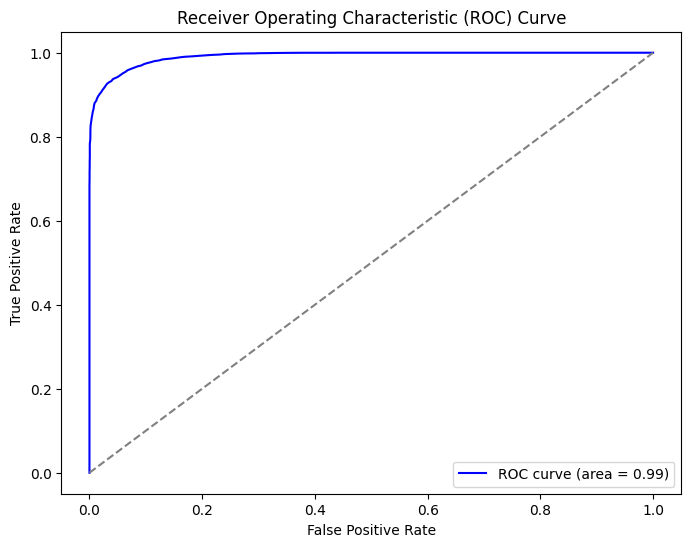

In [26]:
y_prob = rf_cls.predict_proba(X_test_cls)[:, 1]
fpr, tpr, _ = roc_curve(y_test_cls, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

## 🔟 Explainability & Interpretability

### 🔍 Feature Importance (Decision Trees / Random Forest)
- **Why**: Clinicians demand transparency. Knowing which features (e.g., Age, High BP) drive decisions helps **build trust**.


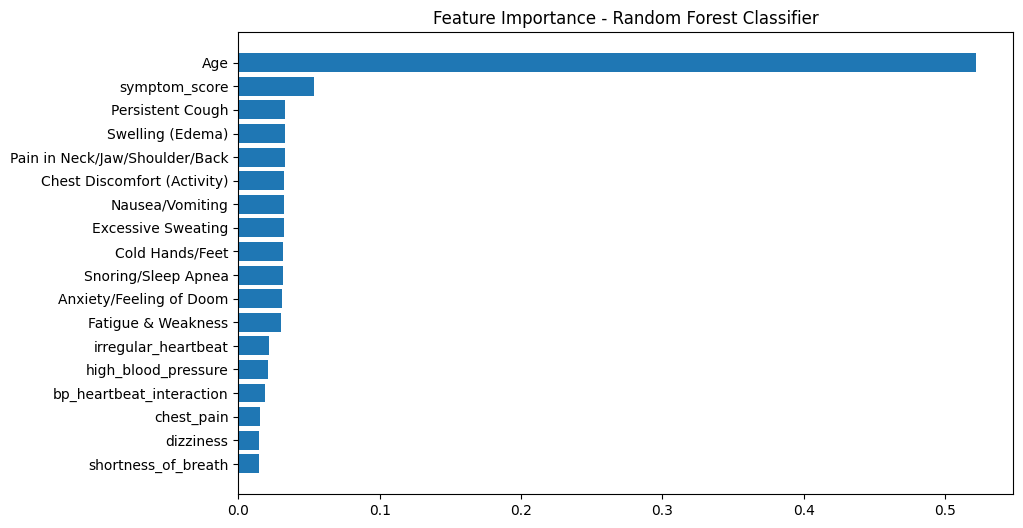

In [27]:
# Feature Importance
importances = rf_cls.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title("Feature Importance - Random Forest Classifier")
plt.show()

### 🔹 Feature Importance:

 **Feature Importance**: Summarizes how often a feature is used for splitting across trees (or how much it reduces impurity).
 
| Feature | Importance |
|---------|------------|
| Age | 53% |
| System Scoe | 5% |
| Prersistent Cough | 4% |

Age is **the strongest risk factor** in stroke prediction.

---

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.


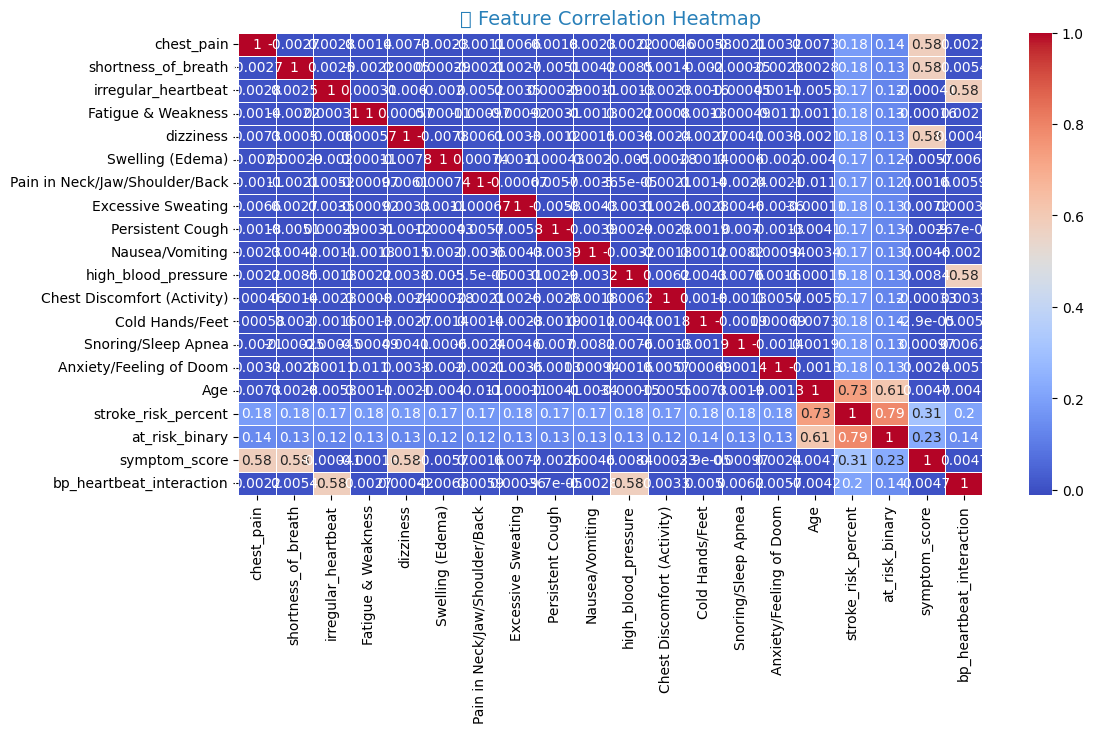

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔍 Feature Correlation Heatmap", fontsize=14, color="#2980b9")
plt.show()


<h2> 1️⃣1️⃣ AI Transparency with SHAP </h2>

<h3>🎯 SHapley Additive exPlanations </h3>
Understanding why a model predicts a high stroke risk is crucial in healthcare. Explainability tools bridge the gap between AI and real-world decision-making. Using <b>SHAP values</b>, we can:

<ul>
  <li> ✅ Identify <b>key stroke risk factors</b> </li>
  <li> ✅ Ensure <b>trust in AI models</b> for healthcare use </li>
</ul>


- **SHAP (SHapley Additive Explanations):** helps quantify the contribution of each feature, such as high blood pressure, irregular heartbeat, or age, to the model’s decision.

- **Visualizing SHAP:** values allows practitioners to trust AI-driven insights, ensuring alignment with medical knowledge.


In [29]:
# (Uncomment if running on CPU, but extremely computationally intensive)

# Use all available CPU cores
#num_cores = multiprocessing.cpu_count()
#
## Initialize SHAP explainer
#explainer = shap.TreeExplainer(
#    rf_cls, 
#    feature_perturbation="tree_path_dependent", 
#    n_jobs=num_cores
#)
#
## Compute SHAP for only 1000 test samples
#X_sample = X_test_cls[:1000]
#shap_values = explainer.shap_values(X_sample, check_additivity=False)
#
## Visualize Feature Importance
#shap.summary_plot(shap_values, X_sample)

In [30]:
# GPU with XGBoost
#explainer = shap.Explainer(
#    rf_cls,  # Model
#    X_train_cls,  # Training data
#    algorithm="gpu_tree"  # GPU-based SHAP algorithm
#)
#
## Compute SHAP values for a sample of 1000 test instances
#X_sample = X_test_cls[:1000]
#shap_values = explainer(X_sample)
#
## Visualize Feature Importance
#shap.summary_plot(shap_values, X_sample)


### 🎛️ Interactive Widgets
Sliders/Toggles for **Age** or **Blood Pressure**. Users can see how a model’s predicted risk changes as they move the widget.


In [31]:
# BP column
df["high_blood_pressure"] = df["high_blood_pressure"].astype(str)  # Convert to string for matching

# Define Widgets
age_slider = widgets.IntSlider(min=18, max=90, step=1, value=50, description="🔢 Age:")
bp_toggle = widgets.ToggleButtons(options=['0', '1'], description="⚕️ High BP:")  # Use '0' and '1' since BP is binary

# Update Plot
def update_plot(age, bp_status):
    # Ensure correct column names
    if 'Age' not in df.columns or 'high_blood_pressure' not in df.columns:
        print(f"Error: Columns missing! Found columns: {df.columns.tolist()}")
        return

    # Filter Age & BP
    filtered_df = df[(df['Age'] >= age - 5) & (df['Age'] <= age + 5) & (df['high_blood_pressure'] == bp_status)]
    
    if filtered_df.empty:
        print(f"No data available for Age {age} and BP: {bp_status}. Try a different selection.")
        return
    
    # Plot Distribution
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.histplot(filtered_df["stroke_risk_percent"], bins=20, kde=True, color="royalblue", ax=ax)  # Ensure correct column name
    ax.axvline(filtered_df["stroke_risk_percent"].mean(), color="red", linestyle="dashed", label="Mean Risk")
    
    ax.set_xlabel("Stroke Risk (%)")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Stroke Risk Distribution for Age {age} and High BP: {bp_status}")
    ax.legend()
    plt.show()

# Render Interactive Output
out = widgets.interactive_output(update_plot, {"age": age_slider, "bp_status": bp_toggle})

# Display Widgets
display(age_slider, bp_toggle, out)


IntSlider(value=50, description='🔢 Age:', max=90, min=18)

ToggleButtons(description='⚕️ High BP:', options=('0', '1'), value='0')

Output()

### 💠 Visualizing Decision Trees
Using tools like **Graphviz** helps break down how certain splits (e.g., Age ≥ 60, Irregular Heartbeat) contribute to stroke classification in **Random Forest** or single trees. This is useful for **explaining** or **debugging** model behavior.


In [32]:
# Optional: Run if you would like to view tree visual
#tree_dot = export_graphviz(
#    rf_cls.estimators_[0], 
#    feature_names=X.columns, 
#    class_names=["No Risk", "At Risk"], 
#    filled=True,
#    rounded=True)
#
#graphviz.Source(tree_dot)

## 1️⃣2️⃣ Future Work 

### 🔮 Future Directions
1. **Hyperparameter Tuning**: E.g., Grid Search or Bayesian Optimization.  
2. **Federated Learning**: Privacy-preserving, trains models across multiple hospitals without sharing raw data.[Google Federated Learning](https://chatgpt.com/c/67ba967b-ce24-8008-ad4f-e64aa50a27ef#:~:text=data%20)  
3. **Multimodal Data**: Combine textual EHR notes, imaging data, and structured patient info.  
4. **Clinical Trials**: Validate real-world performance for regulatory compliance and trust.

---


## 1️⃣3️⃣ Conclusion & References

- **Key Takeaways**:  
  1. Machine Learning enables early detection of stroke risk.  
  2. Explainability is crucial in healthcare AI.  
  3. Advanced algorithms (XGBoost, Neural Networks) often surpass baseline models.  
  4. Future includes federated learning and multimodal data integration.

- **References**:  
  - [CDC: Stroke Facts](https://www.cdc.gov/stroke/facts.htm)  
  - [WHO: Top Causes of Death](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)  
  - [Scikit-Learn Documentation](https://scikit-learn.org/stable/)  
  - [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)  
  - [SHAP GitHub](https://github.com/slundberg/shap)  

By applying these methods, we advance toward trustworthy AI in stroke risk prediction, supporting medical professionals in proactive patient care.
